<a href="https://colab.research.google.com/github/tasyaaash29/TI01_Aulya-Natasya_Praktikum-ML/blob/main/Latihan_praktikum11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install folium

In [2]:
!pip install contextily

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import HeatMap
import geopandas as gpd
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely import wkt

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Praktikum ML/Praktikum11/Data/database.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [6]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [7]:
df.isnull().sum()

,0
Date,0
Time,0
Latitude,0
Longitude,0
Type,0
Depth,0
Depth Error,18951
Depth Seismic Stations,16315
Magnitude,0
Magnitude Type,3


In [8]:
df.duplicated().sum()

np.int64(0)

In [10]:
peta_indonesia = folium.Map(location=[-2.5, 118.0], zoom_start=5)

data_heatmap = df[['Latitude', 'Longitude', 'Magnitude']].values.tolist()

HeatMap(data_heatmap, radius=12, blur=15, max_zoom=6).add_to(peta_indonesia)

peta_indonesia

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

# Jitter koordinat agar tidak tumpang tindih
np.random.seed(42)
long_peta = df['Longitude'] + np.random.uniform(-0.05, 0.05, size=len(df))
lat_peta = df['Latitude'] + np.random.uniform(-0.05, 0.05, size=len(df))

# Konversi ke GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(long_peta, lat_peta),
    crs='EPSG:4326'
)

# Proyeksi ke Web Mercator
gdf = gdf.to_crs(epsg=3857)

# Removed: persentasePendudukMiskin = df.groupby("Kabupaten/Kota")["Persentase Penduduk Miskin"].mean()
# Removed: top_5 = persentasePendudukMiskin.sort_values(ascending=False).head(5)
# Removed: bottom_5 = persentasePendudukMiskin.sort_values().head(5)

# Buat peta dasar Indonesia
peta_indonesia = folium.Map(location=[-2.5, 118.0], zoom_start=5)

# Buat list data [lat, long, value] untuk heatmap
data_heatmap = df[['Latitude', 'Longitude', 'Magnitude']].values.tolist()

# Tambahkan heatmap ke peta
HeatMap(data_heatmap, radius=12, blur=15, max_zoom=6).add_to(peta_indonesia)

# Tampilkan peta
peta_indonesia

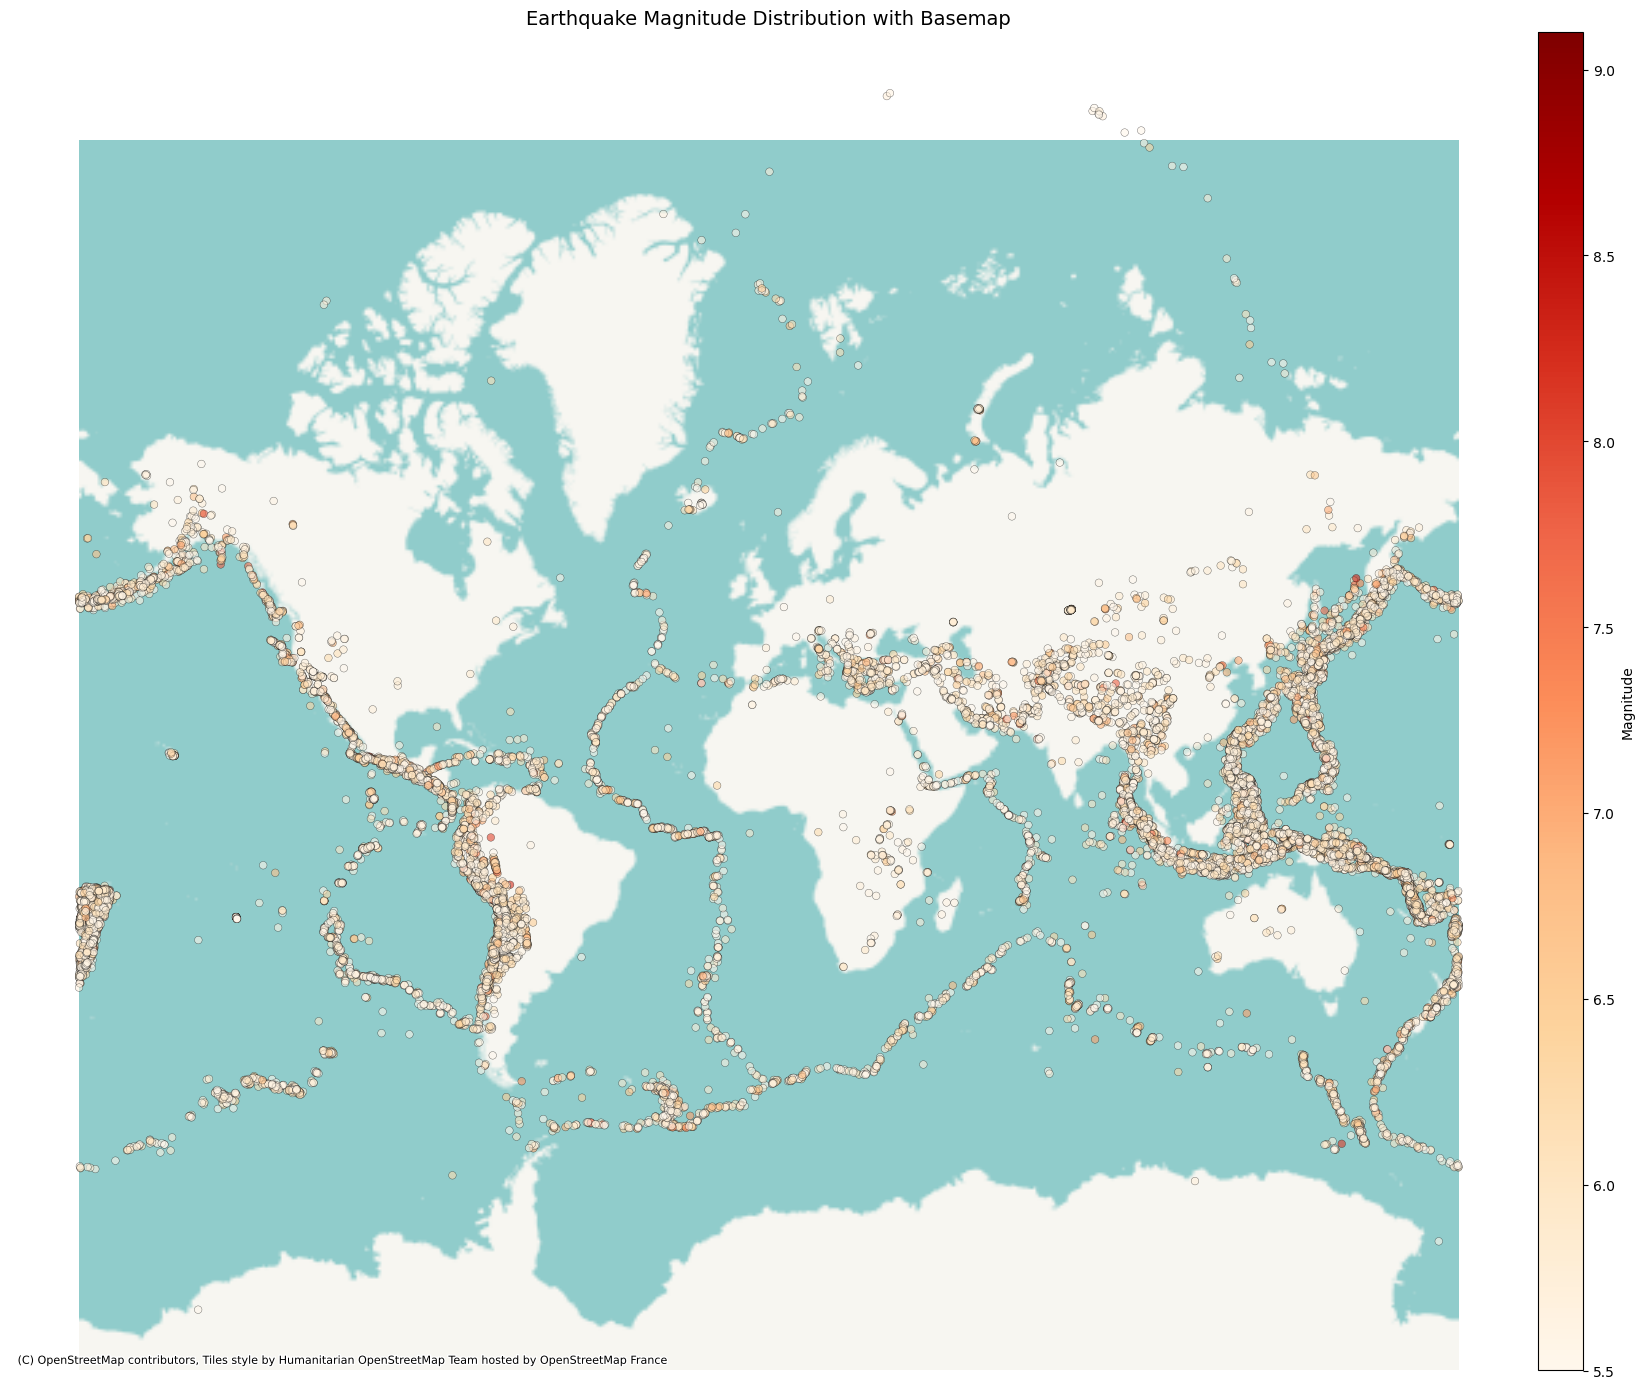

In [16]:
# Buat layout dengan GridSpec
fig = plt.figure(figsize=(18, 14))
gs = gridspec.GridSpec(1, 1)

# --- Row 1: Peta sebaran (colspan=2) ---
ax_map = plt.subplot(gs[0, :])
divider = make_axes_locatable(ax_map)
cax = divider.append_axes("right", size="3%", pad=0.1)

gdf.plot(
    ax=ax_map,
    column='Magnitude',
    cmap='OrRd',
    legend=True,
    legend_kwds={'label': "Magnitude", 'orientation': "vertical"},
    cax=cax,
    markersize=30,
    edgecolor='black',
    linewidth=0.3,
    alpha=0.6
)

ctx.add_basemap(ax_map)
ax_map.set_title("Earthquake Magnitude Distribution with Basemap", fontsize=14)
ax_map.axis('off')

plt.tight_layout()
plt.show()

In [18]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

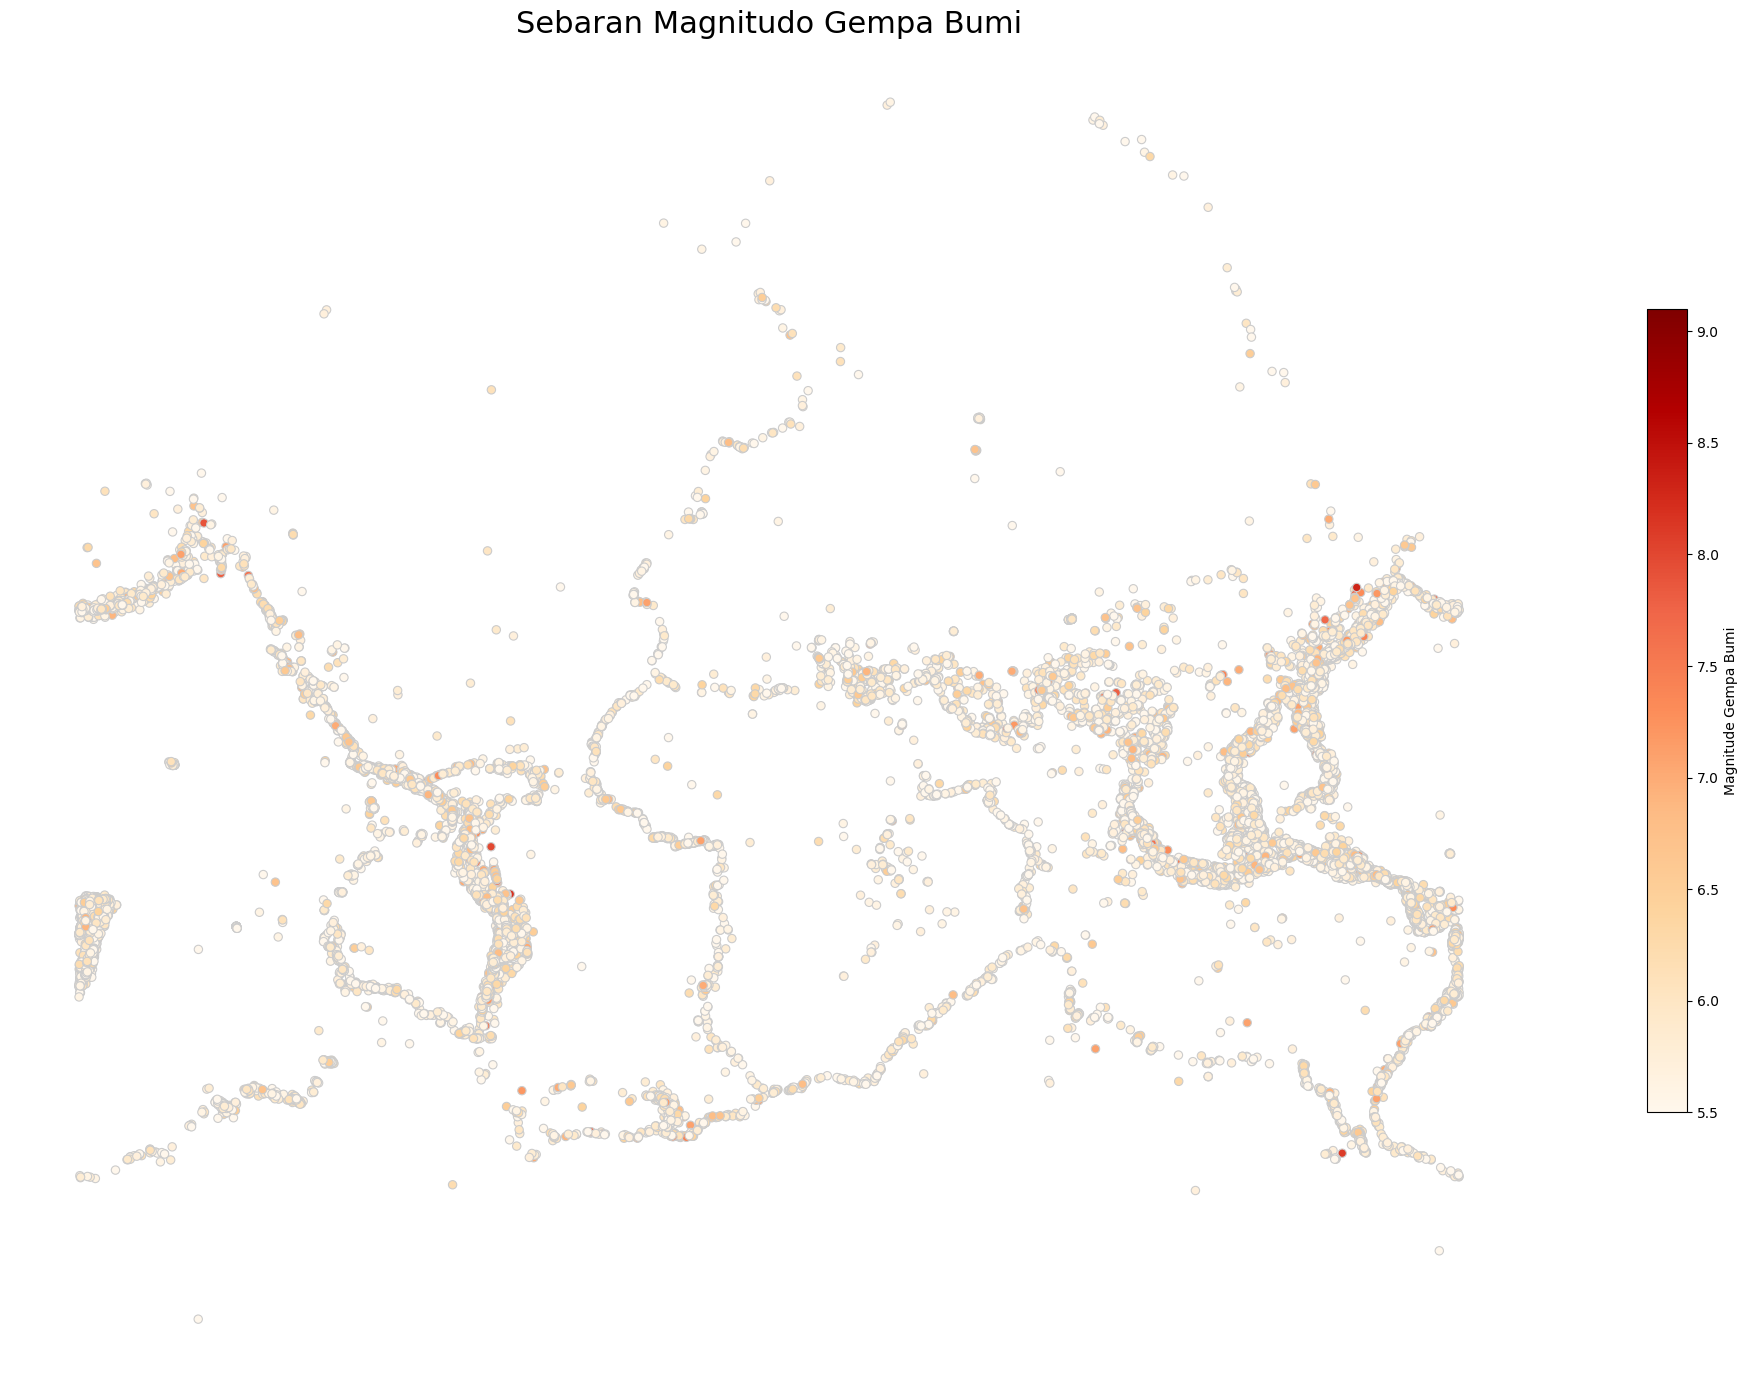

In [20]:
gdf.plot(column='Magnitude',
              cmap='OrRd',
              linewidth=0.8,
              edgecolor='0.8',
              legend=True,
              ax=ax,
              legend_kwds={
                  'label': "Magnitude Gempa Bumi",
                  'orientation': "vertical",
                  'shrink': 0.6,
                  'aspect': 20
              })

# The annotation loop for provinces is not applicable for point data as it would be too cluttered.
# It's also based on the 'Provinsi' column which is not in this dataset.

ax.set_title("Sebaran Magnitudo Gempa Bumi", fontsize=22)
ax.axis('off')
plt.tight_layout()
plt.show()

In [22]:
from scipy.stats import shapiro

# The columns specified in the previous df.drop() call do not exist in the current DataFrame 'df'.
# I will remove the problematic line that attempts to drop non-existent columns.
# If you intend to drop specific columns for a normality test, please specify existing column names.

normalityTest_df = df.copy()

normalityTest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [24]:
stat, p = shapiro(normalityTest_df['Magnitude'])

print("Statik: ", stat)
print("P-value: ", p)

if p > 0.05:
    print("Data berdistribusi normal (tidak tolak H0)")
else:
    print("Data tidak berdistribusi normal (tolak H0)")

Statik:  0.8101573265812242
P-value:  2.7469506729969158e-95
Data tidak berdistribusi normal (tolak H0)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23412.
  res = hypotest_fun_out(*samples, **kwds)


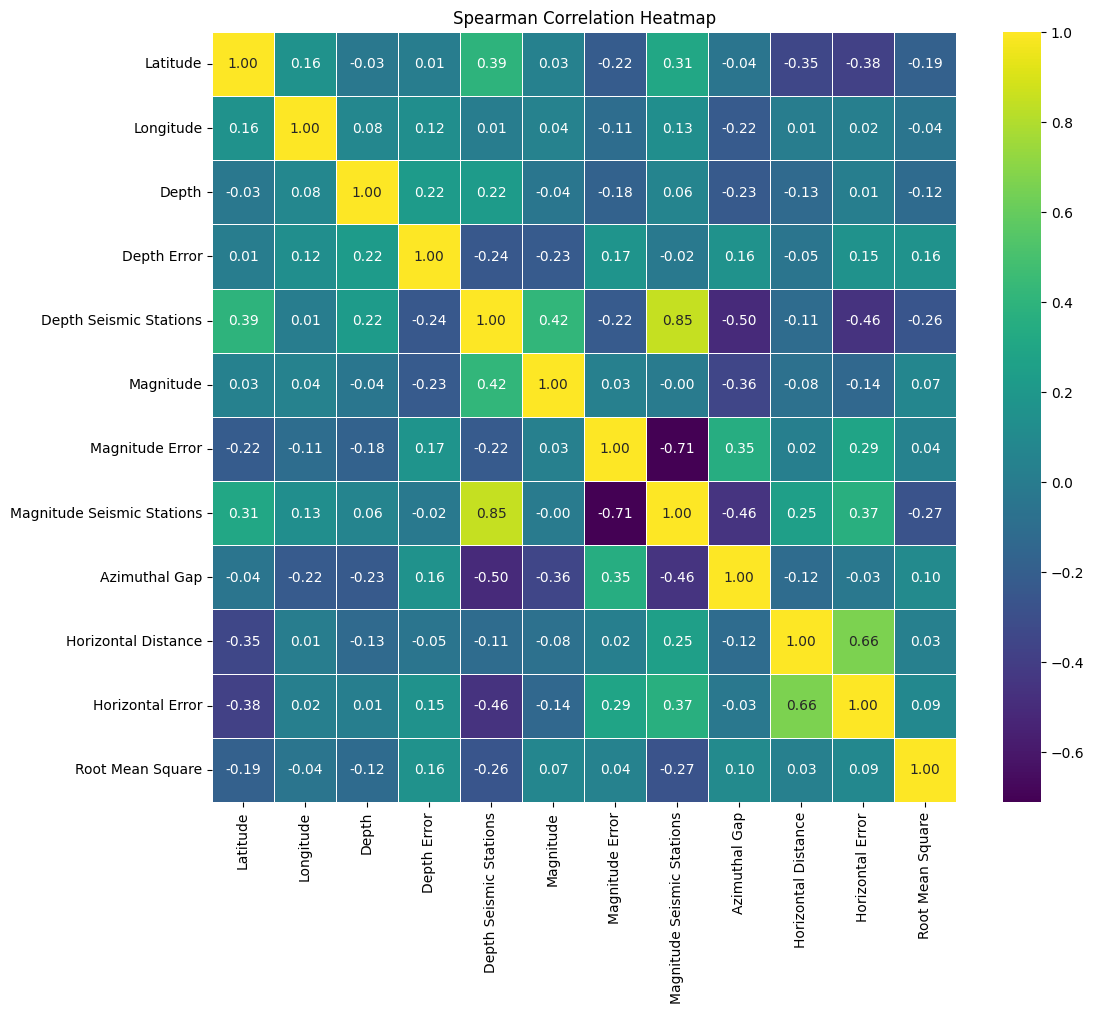

In [26]:
correlation_df = normalityTest_df.copy()

# Select only numeric columns for correlation calculation
numeric_cols = correlation_df.select_dtypes(include=np.number).columns
correlation_matrix = correlation_df[numeric_cols].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()

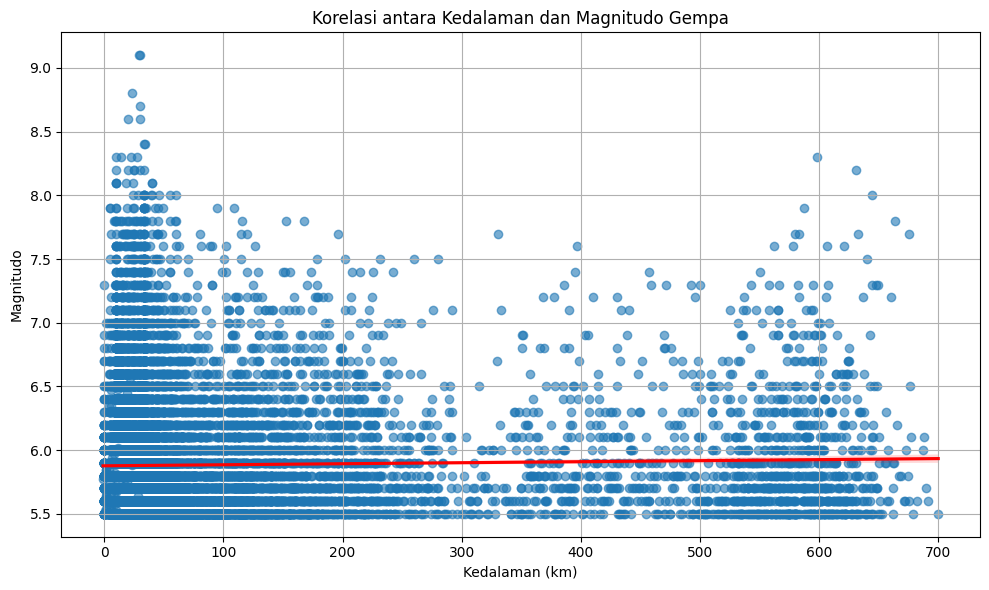

In [28]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x="Depth",
    y="Magnitude",
    data=df,
    scatter_kws={'alpha': 0.6},
    line_kws={"color": "red"}
)
plt.title("Korelasi antara Kedalaman dan Magnitudo Gempa")
plt.xlabel("Kedalaman (km)")
plt.ylabel("Magnitudo")
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# The columns listed in the original drop operation do not exist in the current DataFrame 'df'.
# Removing the drop operation to resolve the KeyError.
# If specific columns need to be dropped or selected for normalization, please specify them from df.columns.
normalisasi_df = df.copy()

normalisasi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [32]:
from sklearn.preprocessing import RobustScaler

# Select only numerical columns for scaling
numerical_cols = normalisasi_df.select_dtypes(include=np.number).columns

scaler = RobustScaler()
normalisasi_df[numerical_cols] = scaler.fit_transform(normalisasi_df[numerical_cols])

# Display the head of the scaled numerical columns
normalisasi_df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,0.508755,0.188069,Earthquake,2.497625,NaN,NaN,0.75,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,0.121121,0.105567,Earthquake,1.190552,NaN,NaN,0.25,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-0.379328,-1.255574,Earthquake,-0.329302,NaN,NaN,1.25,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-1.237798,-0.576119,Earthquake,-0.455956,NaN,NaN,0.25,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,0.345790,0.101389,Earthquake,-0.455956,NaN,NaN,0.25,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


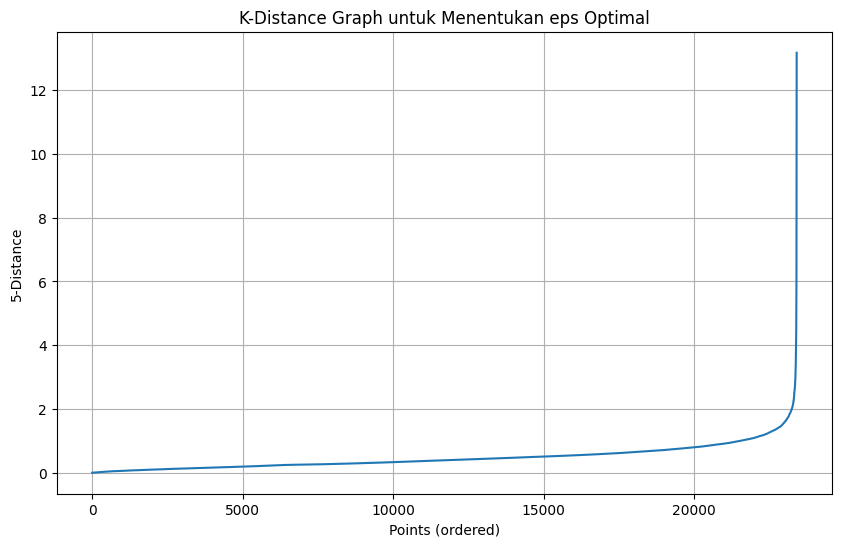

In [37]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Gunakan data hasil normalisasi, pastikan hanya kolom numerik yang digunakan
X = normalisasi_df.select_dtypes(include=np.number).copy()

# Impute NaN values with the median of each column
# This is done after selecting numerical columns, but before converting to a numpy array for NearestNeighbors
for col in X.columns:
    if X[col].isnull().any():
        median_val = X[col].median()
        X[col] = X[col].fillna(median_val) # Modified line to resolve FutureWarning

X = X.values # Convert to numpy array after imputation

# Tentukan jumlah tetangga (min_samples biasanya = 4–10)
k = 5

# Fit nearest neighbors
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Ambil jarak tetangga ke-k (k-distance)
k_distances = np.sort(distances[:, k-1])

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title("K-Distance Graph untuk Menentukan eps Optimal")
plt.ylabel(f"{k}-Distance")
plt.xlabel("Points (ordered)")
plt.grid(True)
plt.show()

In [38]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.0, min_samples=5)
labels = dbscan.fit_predict(X)

df["Cluster_DBSCAN"] = labels
print(df["Cluster_DBSCAN"].value_counts())

Cluster_DBSCAN
 0    23378
-1       25
 1        9
Name: count, dtype: int64


In [40]:
from sklearn.metrics import silhouette_score

mask = labels != -1   # hilangkan noise
score = silhouette_score(X[mask], labels[mask])

print("Silhouette Score:", score)

Silhouette Score: 0.8920201549274247


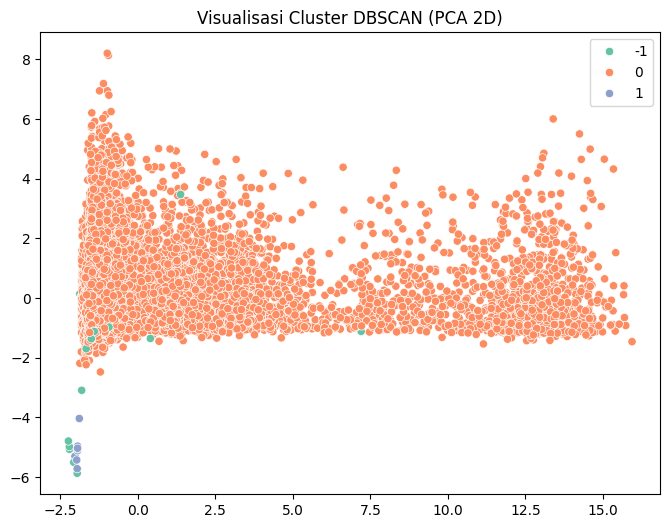

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=labels, palette="Set2")
plt.title("Visualisasi Cluster DBSCAN (PCA 2D)")
plt.show()

In [43]:
def klasifikasi_db(x):
    if x == 0:
        return "Baik"
    elif x == -1:
        return "Noise"
    else:
        return "Kurang"

df['Klasifikasi_DBSCAN'] = df['Cluster_DBSCAN'].apply(klasifikasi_db)

print(df['Klasifikasi_DBSCAN'].value_counts())

Klasifikasi_DBSCAN
Baik      23378
Noise        25
Kurang        9
Name: count, dtype: int64
